# Import Tools

In [2]:
import os
import json
import cv2
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import torch
HOME = os.getcwd()
print(HOME)
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

C:\Users\USER\Downloads\DeepFashion2\DeepFashion2


In [3]:
!pip install -q ultralytics supervision --upgrade supervision
from ultralytics import YOLO
import supervision as sv

In [4]:
DATA_PATH = f"{HOME}/yolov9/deepfashion2-m-11k-1"
IMAGE_PATH = f"{HOME}/yolov9/deepfashion2-m-11k-1/train/images"
WEIGHT_PATH = f"{HOME}/yolov9/weights/yolov9c.pt"
# SINGLE_IMAGE = IMAGE_PATH + "/000001_png.rf.3efc63de2fe2bab8882abc87437bf048.jpg"
SINGLE_IMAGE = "yolov9/mytest/5.jpeg"

# Get the model

In [5]:
# model = YOLO(WEIGHT_PATH)
# model.info()

In [6]:
model = YOLO(f"{HOME}/runs/detect/train18/weights/best.pt")
model.info()

YOLOv9c summary: 618 layers, 25539255 parameters, 0 gradients, 103.7 GFLOPs


(618, 25539255, 0, 103.73452800000001)

In [7]:
pp_model = YOLO("yolov9/weights/yolov9c.pt")
pp_model.info()

YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [8]:
# model.val(data=DATA_PATH+"/data.yaml",imgsz=480,batch=16,conf=0.25,iou=0.6,device='0')

# Get the data

In [9]:
# rf = Roboflow(api_key="grBnAXmaVyCZOXlCtfQ7")
# project = rf.workspace("bmstu-lvj0c").project("deepfashion2-m-11k")
# version = project.version(1)
# dataset = version.download("yolov9")

In [10]:
# Image(filename=f"{HOME}/yolov9/runs/detect/exp/000001_png.rf.3efc63de2fe2bab8882abc87437bf048.jpg", width=600)

# Model Training

In [11]:
# results = model.train(data=f'{DATA_PATH}/data.yaml', epochs=1000, imgsz=480, patience=200)

# Inference

In [130]:
test = [f"yolov9/mytest/{file}" for file in os.listdir("yolov9/mytest")]
test

['yolov9/mytest/20240109_123839.jpg',
 'yolov9/mytest/8251ceb5d1c2fb101f15baf4351676c0.jpg',
 'yolov9/mytest/c1_2315650.jpg',
 'yolov9/mytest/gettyimages-200244581-003-612x612.jpg',
 'yolov9/mytest/images (1).jpg',
 'yolov9/mytest/images.jpg',
 'yolov9/mytest/Screenshot_20240408_123727_Gallery.jpg',
 'yolov9/mytest/Screenshot_20240408_123922_Gallery.jpg',
 'yolov9/mytest/TELEMMGLPICT000181573274_trans_NvBQzQNjv4BqQgZ35IH_qFuivp0kJRGEKwE0otxEDCMfSU0Iy915Xgs.webp',
 'yolov9/mytest/thai-people.webp']

In [131]:
results = model(test, imgsz=480)
results[0]


0: 480x480 2 short sleeve tops, 1 skirt, 1 trousers, 32.1ms
1: 480x480 8 short sleeve tops, 3 shortss, 5 skirts, 1 trousers, 32.1ms
2: 480x480 5 short sleeve tops, 1 skirt, 1 trousers, 32.1ms
3: 480x480 (no detections), 32.1ms
4: 480x480 2 short sleeve tops, 32.1ms
5: 480x480 1 long sleeve top, 1 trousers, 32.1ms
6: 480x480 1 trousers, 32.1ms
7: 480x480 1 short sleeve top, 1 shorts, 32.1ms
8: 480x480 2 long sleeve tops, 2 trouserss, 32.1ms
9: 480x480 7 long sleeve outwears, 3 trouserss, 32.1ms
Speed: 2.0ms preprocess, 32.1ms inference, 18.9ms postprocess per image at shape (1, 3, 480, 480)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'long sleeve dress', 1: 'long sleeve outwear', 2: 'long sleeve top', 3: 'short sleeve dress', 4: 'short sleeve outwear', 5: 'short sleeve top', 6: 'shorts', 7: 'skirt', 8: 'sling', 9: 'sling dress', 10: 'trousers', 11: 'vest', 12: 'vest dress'}
obb: None
orig_img: array([[[140, 151, 159],
        [140, 151, 159],
        [139, 150, 158],
        ...,
        [108, 124, 136],
        [106, 122, 134],
        [104, 120, 132]],

       [[140, 151, 159],
        [140, 151, 159],
        [140, 151, 159],
        ...,
        [109, 125, 137],
        [107, 123, 135],
        [105, 121, 133]],

       [[138, 149, 157],
        [139, 150, 158],
        [140, 151, 159],
        ...,
        [110, 126, 138],
        [109, 125, 137],
        [107, 123, 135]],

       ...,

       [[138, 165, 179],
        [138, 165, 179],
        [138, 165, 179],
      

In [132]:
pp_results = pp_model(test, imgsz=480)
pp_results[0]


0: 480x480 12 persons, 1 backpack, 7 chairs, 4 laptops, 17.6ms
1: 480x480 14 persons, 17.6ms
2: 480x480 12 persons, 3 backpacks, 1 handbag, 17.6ms
3: 480x480 19 persons, 17.6ms
4: 480x480 8 persons, 1 car, 17.6ms
5: 480x480 1 person, 1 chair, 17.6ms
6: 480x480 4 persons, 1 bottle, 1 cell phone, 17.6ms
7: 480x480 4 persons, 17.6ms
8: 480x480 3 persons, 1 backpack, 17.6ms
9: 480x480 7 persons, 2 umbrellas, 5 handbags, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 480)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

# SAM

In [133]:
# !pip install -q git+https://github.com/facebookresearch/segment-anything.git
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
# CHECKPOINT_PATH = f"{HOME}/yolov9/weights/sam_vit_h_4b8939.pth"
CHECKPOINT_PATH = f"{HOME}/yolov9/weights/sam_vit_b_01ec64.pth"

# MODEL_TYPE = "vit_h"
MODEL_TYPE = "vit_b"

In [134]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_predictor = SamPredictor(sam)

box_annotator = sv.BoundingBoxAnnotator(color=sv.Color.YELLOW, color_lookup = sv.ColorLookup.INDEX)
mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER, color_lookup = sv.ColorLookup.INDEX)
corner_annotator = sv.BoxCornerAnnotator(color=sv.Color.GREEN)

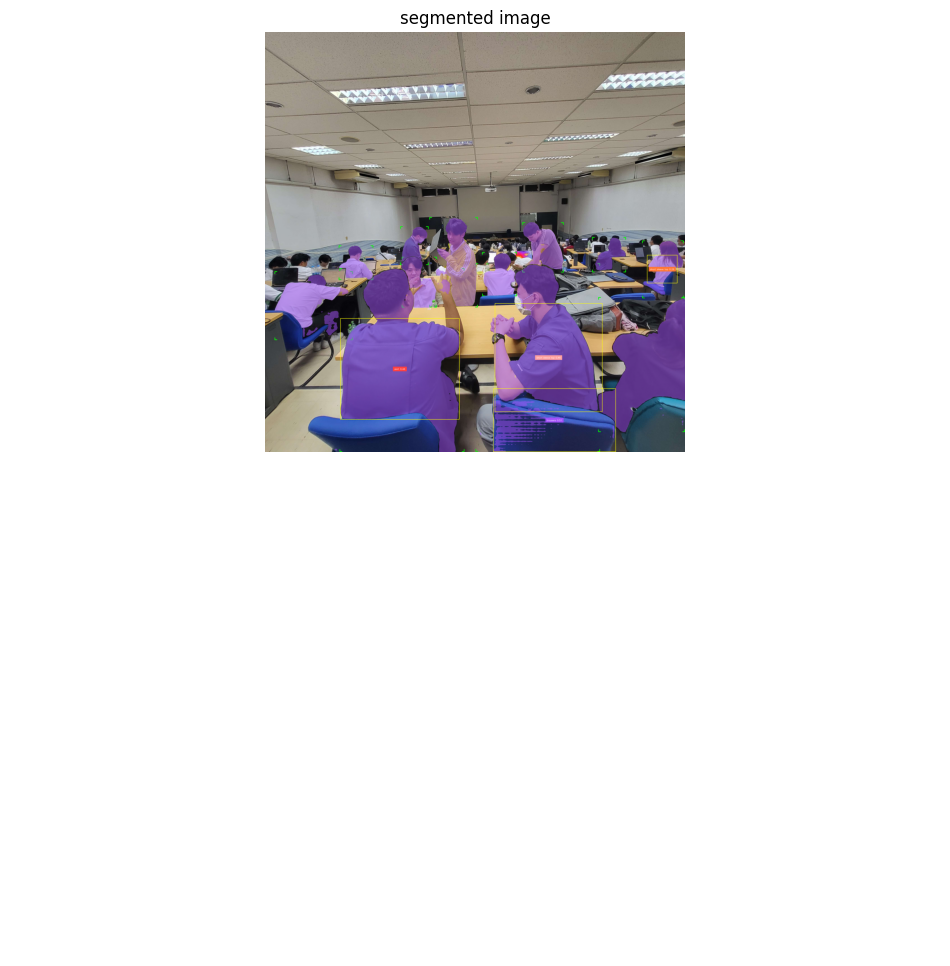

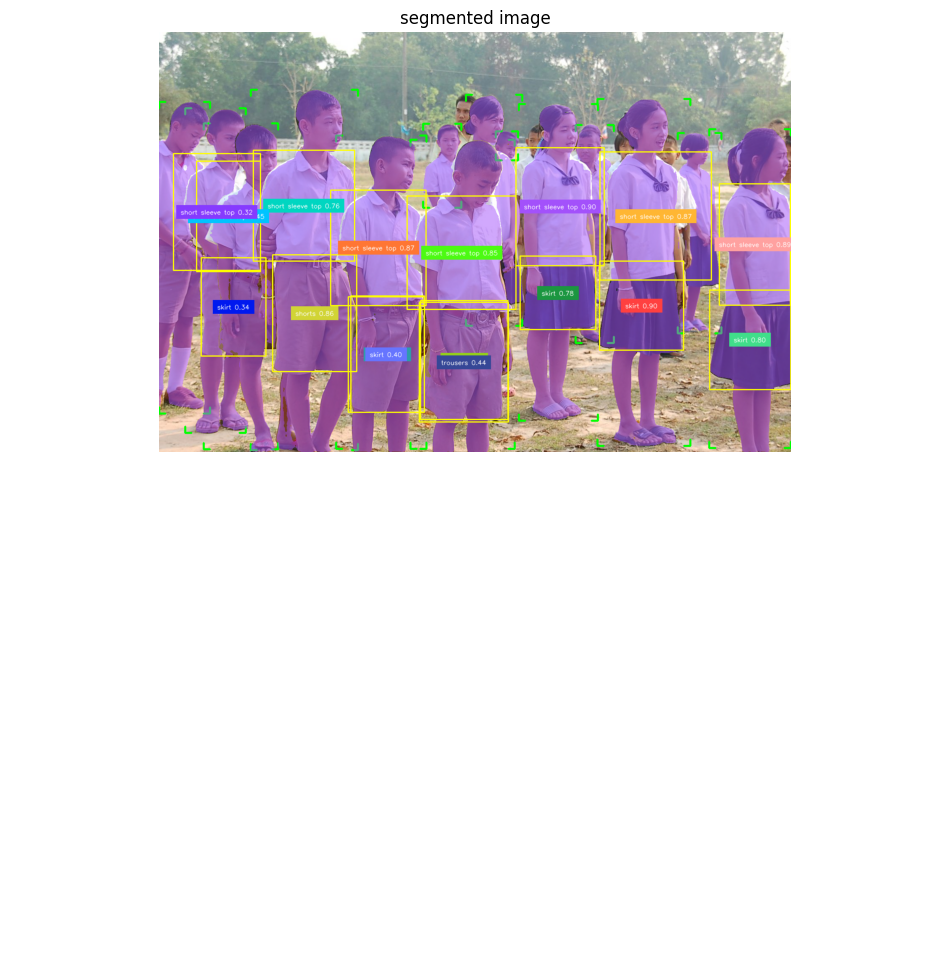

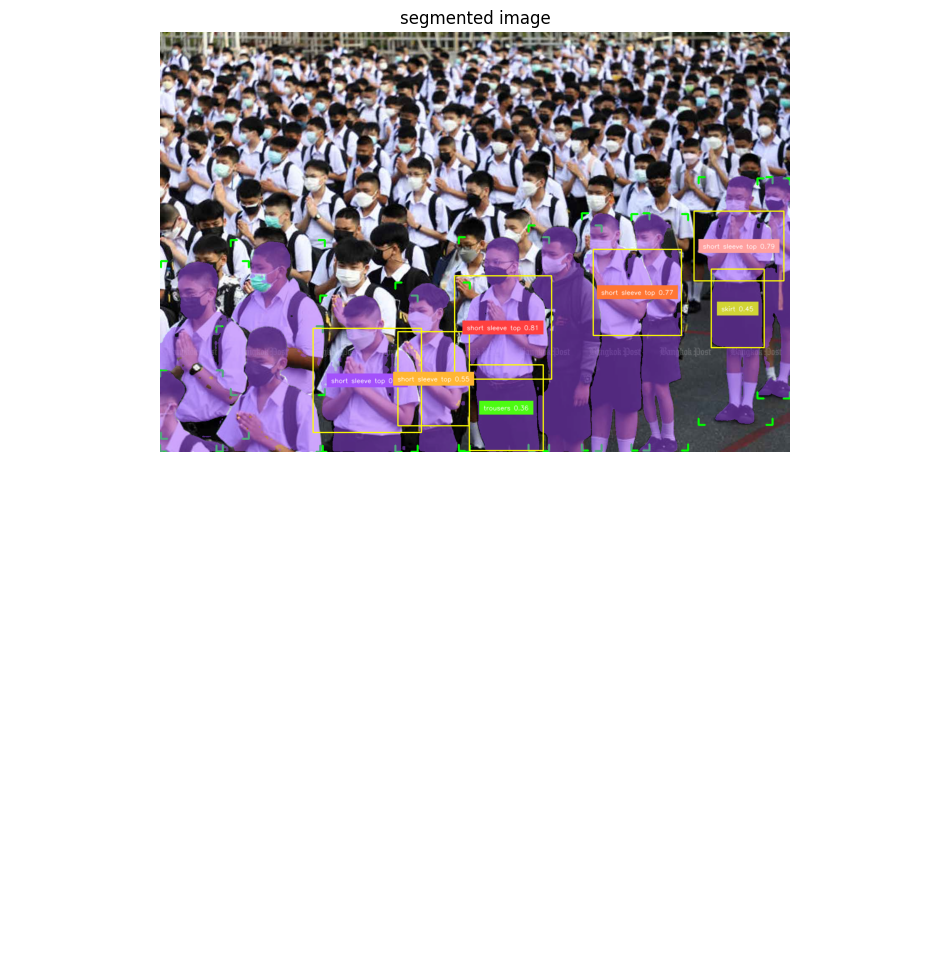

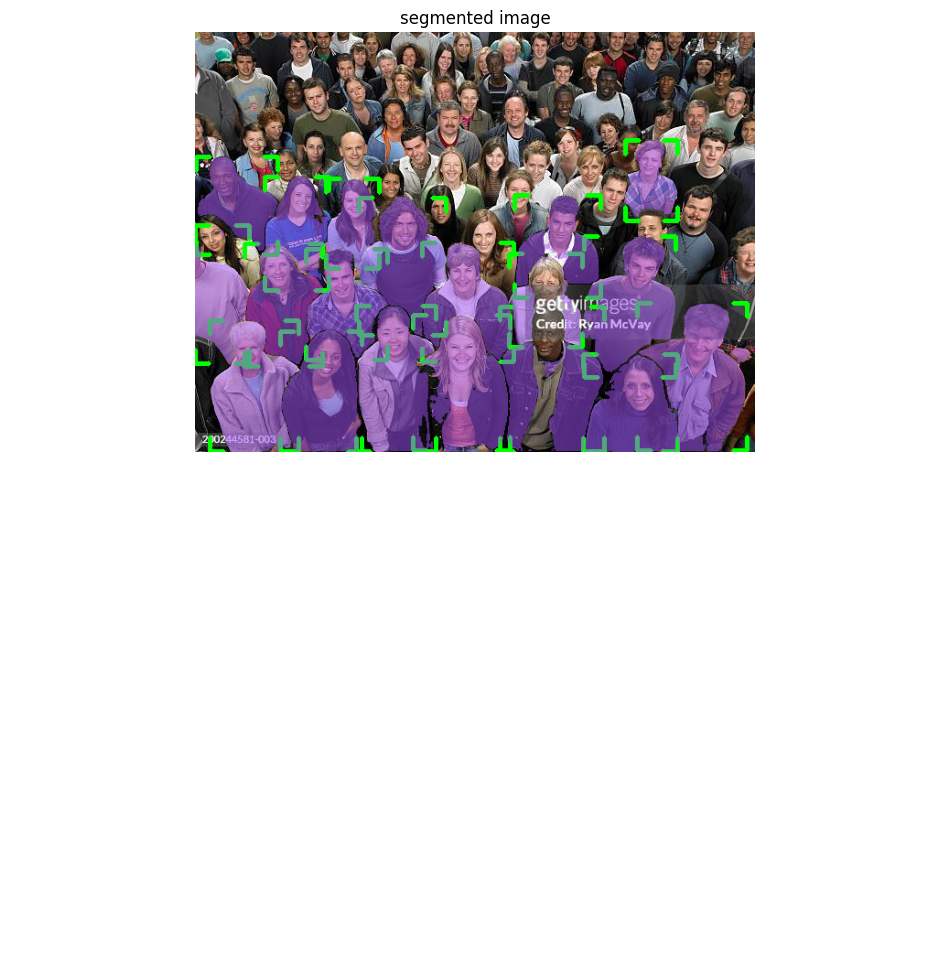

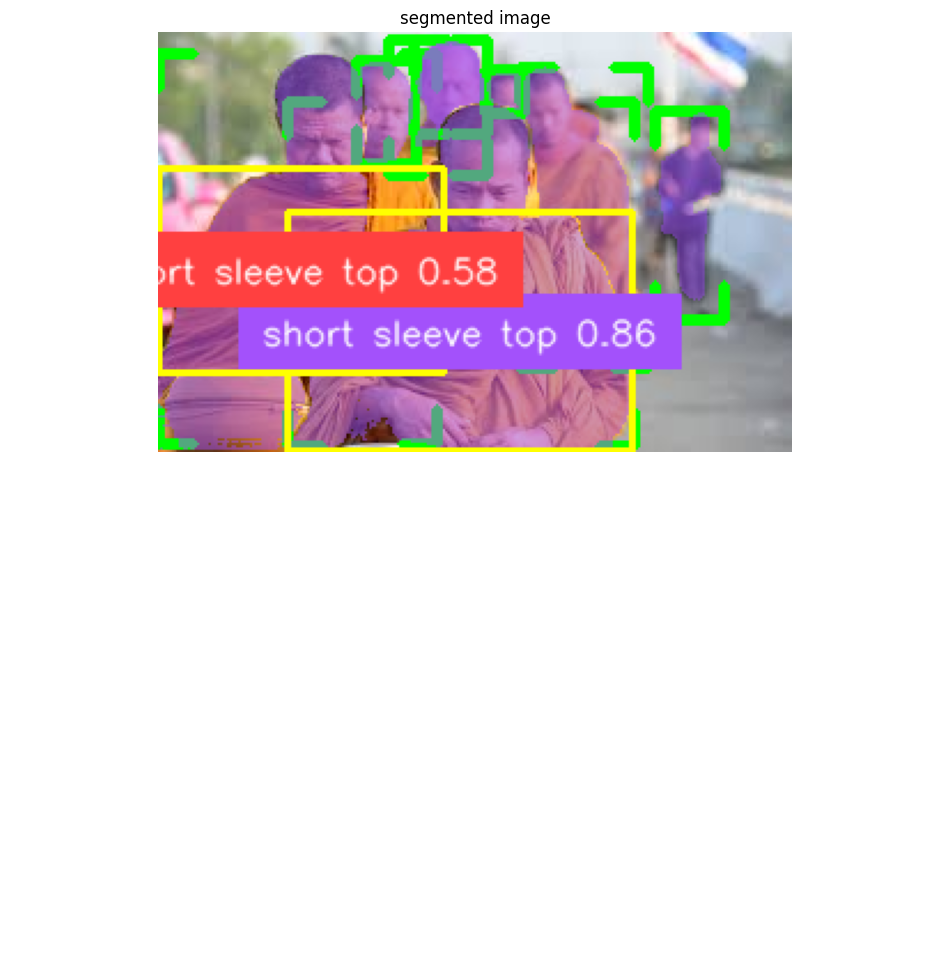

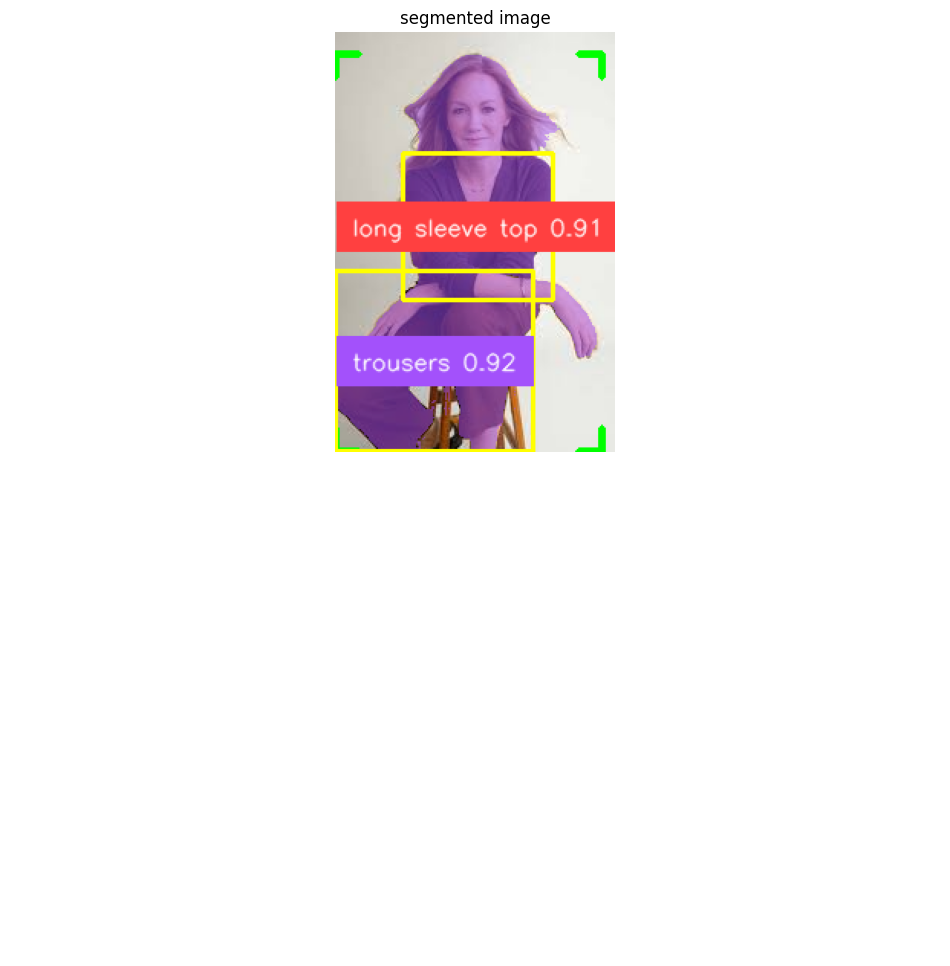

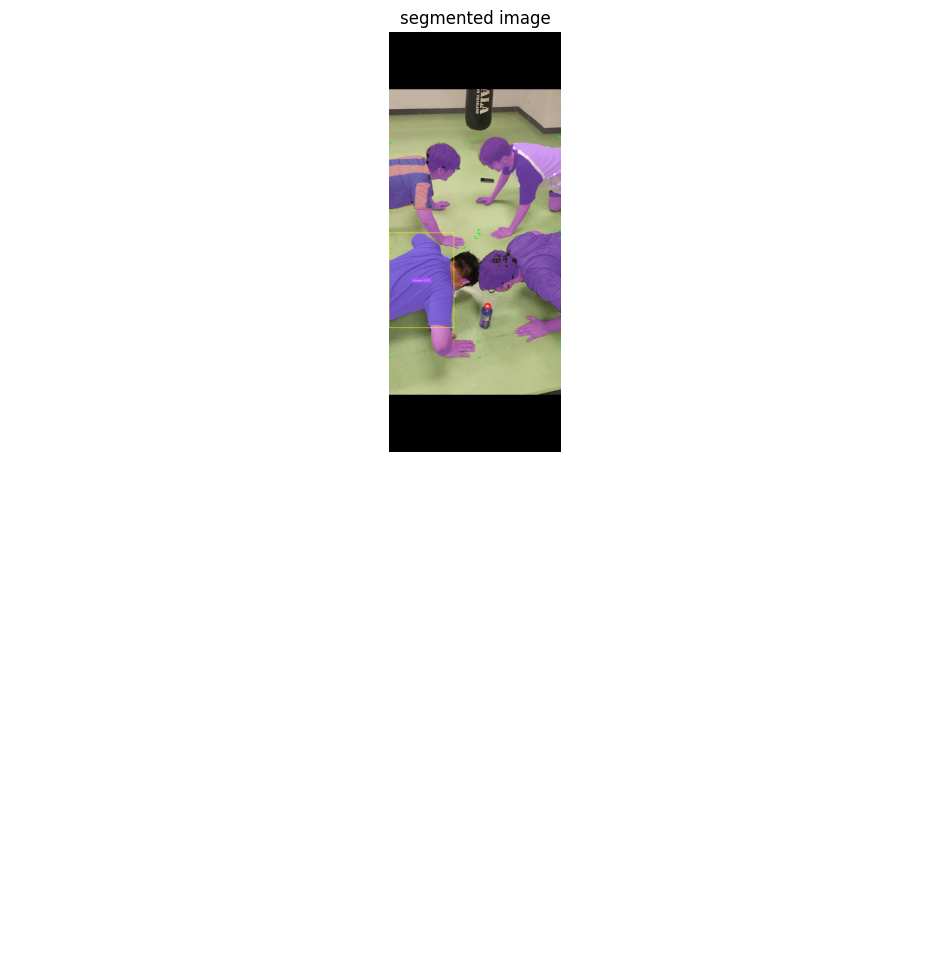

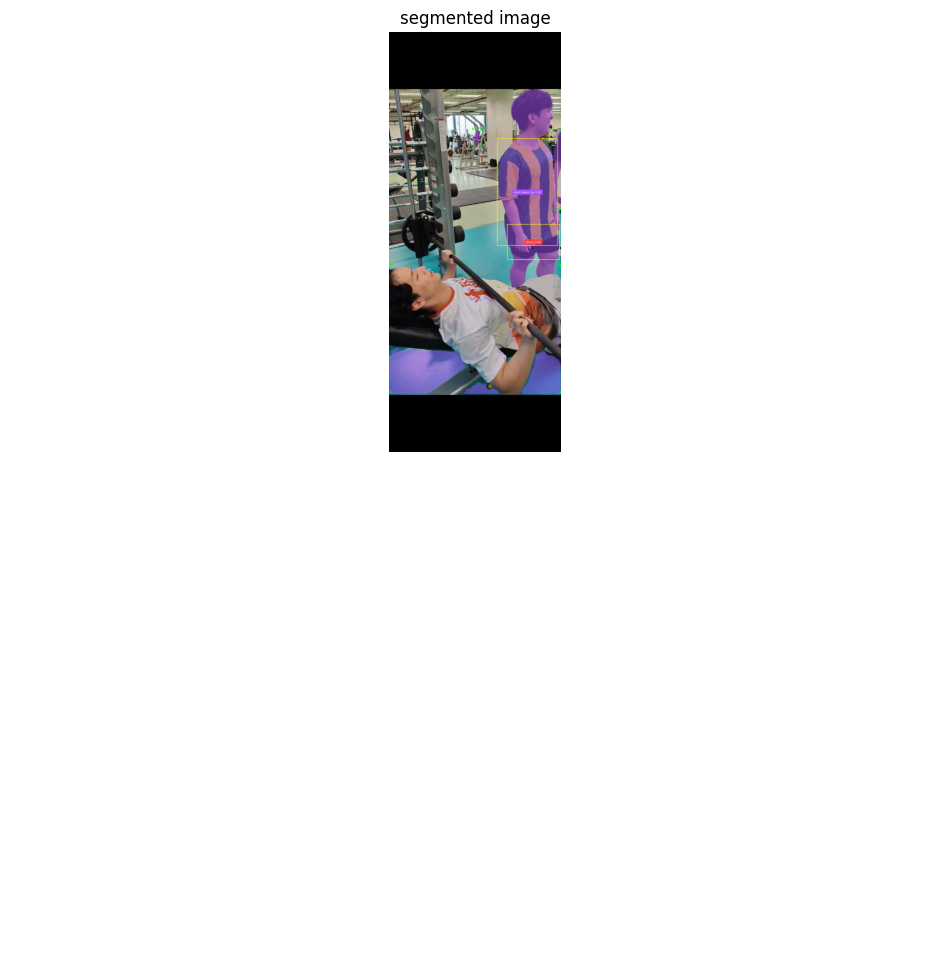

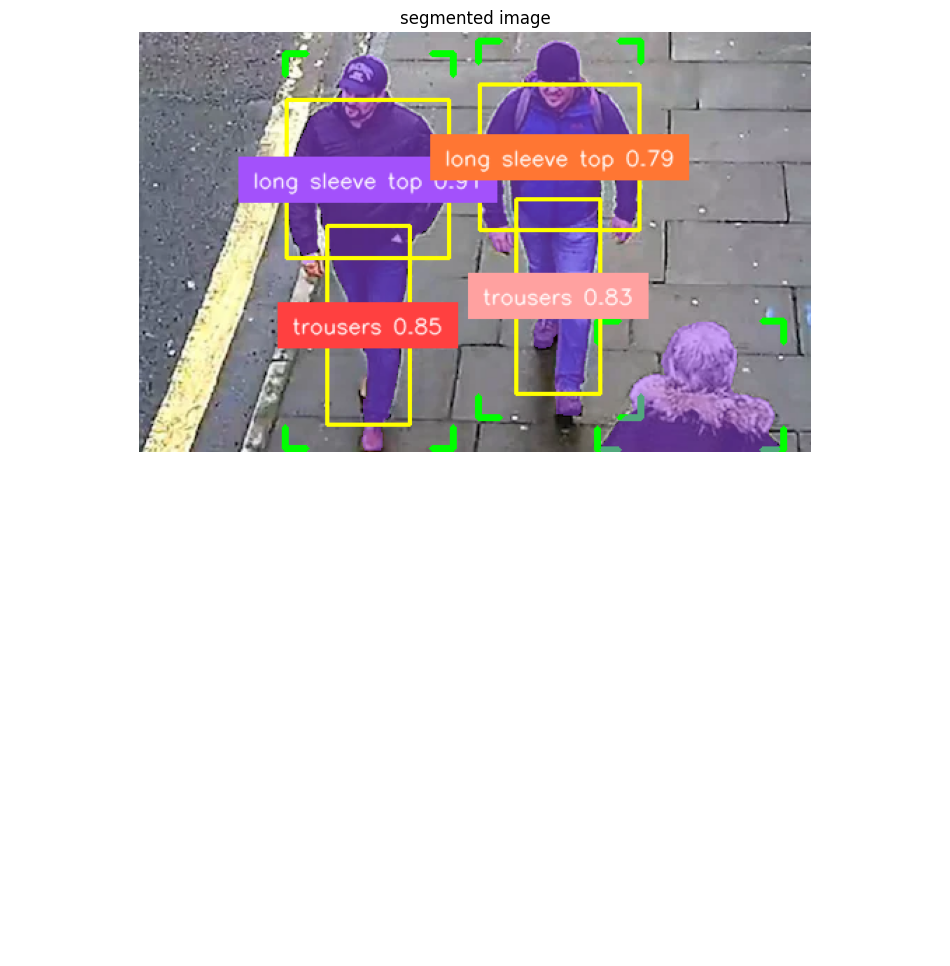

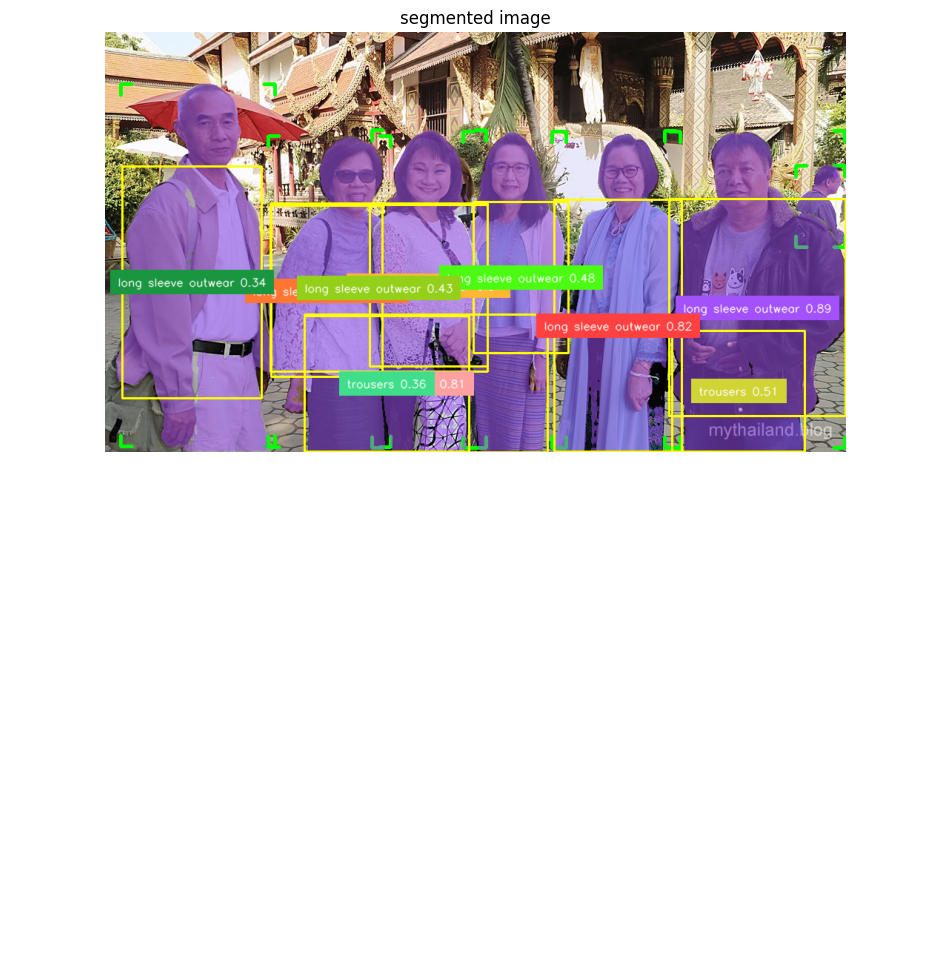

In [136]:
for i, pr in enumerate(pp_results):    
    annotated_image = cv2.imread(pr.path)
    image_name = pr.path.split("/")[-1].rsplit(".", 1)[0]
    mask_predictor.set_image(annotated_image)
    
    pp_detections = sv.Detections.from_ultralytics(pr)
    pp_detections = pp_detections[pp_detections.class_id == 0]
    annotated_image = corner_annotator.annotate(annotated_image, pp_detections)
    
    for box in pr.boxes:
        input_box = np.array(box.xyxy.tolist()[0])
        masks, _, _ = mask_predictor.predict(
            point_coords=None,
            point_labels=None,
            box=input_box[None, :],
            multimask_output=False,
        )

        pp_detections = sv.Detections(
            xyxy=sv.mask_to_xyxy(masks=masks),
            mask=masks,
            class_id=np.array(box.cls.tolist()),
            confidence=np.array(box.conf.tolist())
        ).with_nms(threshold=0.1)
        
        pp_detections = pp_detections[pp_detections.class_id == 0]
        annotated_image = mask_annotator.annotate(scene=annotated_image, detections=pp_detections)
    
    
    # Fashion
    result = results[i]
    detections = sv.Detections.from_ultralytics(result).with_nms(threshold=0.1)
    labels = [f"{result.names[class_id]} {confidence:.2f}" for xy, mask, confidence, class_id, tracker_id, data in detections]

    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    

    sv.plot_images_grid(
        images=[annotated_image],
        grid_size=(2, 1),
        titles=['segmented image']
    )

    
    # Save annotated image
    with sv.ImageSink(target_dir_path=f'runs/detect/manual/', overwrite=False) as sink:
        sink.save_image(image=annotated_image, image_name=f'{image_name}.jpg')
        
    # Save annotated txt
    result.save_txt(f'{result.path.rsplit(".", 1)[0]}.txt')

In [ ]:
# fashion_results = model("person/person", imgsz=480, save=False)
# fashion_results

In [ ]:
# len(fashion_results)

In [98]:
# fashion_results[0].show()
# # fashion_results[0].save_crop("fashion")

# Upload dataset

In [156]:
import roboflow
import glob


rf = roboflow.Roboflow(api_key="")
project = rf.workspace("jwizzed").project("fashion-x1swm")

loading Roboflow workspace...
loading Roboflow project...


In [157]:
dir_name = f"{HOME}/yolov9/mytest"
file_extension_type = [".jpg", ".png", ".jpeg", ".webp"]

image_glob = [file for ext_type in file_extension_type for file in glob.glob(dir_name + '/*' + ext_type)]

for image_path in image_glob:
    annot_path = image_path.rsplit(".", 1)[0] + ".txt"
    annot_path = annot_path if os.path.exists(annot_path) else None
    print(project.single_upload(
        image_path=image_path,
        annotation_path=annot_path,
    ))

{'image': {'success': True, 'id': 'u1WIOKPk1gN7YBcDVloF'}, 'annotation': {'success': True}, 'upload_time': 5.829010963439941, 'annotation_time': 1.0019919872283936}
{'image': {'success': True, 'id': 'drrteocMALyStRLbKZcC'}, 'annotation': {'success': True}, 'upload_time': 4.348002672195435, 'annotation_time': 1.123000144958496}
{'image': {'success': True, 'id': 'HOXR5hYMFx48V4W7XZt6'}, 'annotation': {'success': True}, 'upload_time': 2.7090094089508057, 'annotation_time': 0.8689875602722168}
{'image': {'success': True, 'id': 'qRrpojSG9zBcsLgBQDMJ'}, 'annotation': None, 'upload_time': 2.6800103187561035, 'annotation_time': None}
{'image': {'success': True, 'id': 'HIBtCUxRyPYJO406cXTt'}, 'annotation': {'success': True}, 'upload_time': 0.9860019683837891, 'annotation_time': 0.9089875221252441}
{'image': {'success': True, 'id': 'XFoOtpl1lUmgWsBkit6E'}, 'annotation': {'success': True}, 'upload_time': 1.8720018863677979, 'annotation_time': 0.8840103149414062}
{'image': {'success': True, 'id': 